In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt

In [139]:
netflix_rerelease_df = pd.read_csv('data/netflix_rereleases.csv')
ratings_df = pd.read_csv("data/movie_lense/ratings.csv")
oscars_df = pd.read_csv("data/oscars.csv")
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit = 's')
ratings_df

,userId,movieId,rating,timestamp
0,1,307,3.5,2009-10-27 21:00:21
1,1,481,3.5,2009-10-27 21:04:16
2,1,1091,1.5,2009-10-27 21:04:31
3,1,1257,4.5,2009-10-27 21:04:20
4,1,1449,4.5,2009-10-27 21:01:04
...,...,...,...,...
27753439,283228,8542,4.5,2013-09-22 20:46:35
27753440,283228,8712,4.5,2013-09-22 20:45:51
27753441,283228,34405,4.5,2013-09-22 20:48:09
27753442,283228,44761,4.5,2012-11-29 03:25:24


In [150]:
oscar_movieId = 179133
oscar_information = oscars_df[oscars_df['movieId'] == oscar_movieId]
oscar_information

,Unnamed: 0,year_ceremony,winner,ACTOR IN A LEADING ROLE,ACTOR IN A SUPPORTING ROLE,ACTRESS IN A LEADING ROLE,ACTRESS IN A SUPPORTING ROLE,ANIMATED FEATURE FILM,ART DIRECTION,BEST PICTURE,...,SOUND MIXING,VISUAL EFFECTS,WRITING (Adapted Screenplay),WRITING (Original Screenplay),WRITING (Screenplay Based on Material Previously Produced or Published),WRITING (Screenplay Written Directly for the Screen),release,movieId,title_y,genres
233,233,2018,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2017,179133,Loving Vincent,Animation|Crime|Drama


In [151]:
oscar_ratings_df = ratings_df[ratings_df['movieId'] == oscar_movieId]
oscar_ratings_df['timestamp'] = pd.to_datetime(oscar_ratings_df['timestamp'], unit = 's')
oscar_ratings_df

<ipython-input-151-f233dd92e4c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscar_ratings_df['timestamp'] = pd.to_datetime(oscar_ratings_df['timestamp'], unit = 's')


,userId,movieId,rating,timestamp
21921,214,179133,4.0,2018-05-03 17:56:29
130541,1272,179133,3.5,2017-11-21 15:24:52
152811,1507,179133,4.0,2018-03-16 16:33:06
203145,2025,179133,3.5,2018-04-30 03:56:43
394639,4044,179133,3.0,2018-03-30 20:52:05
...,...,...,...,...
26842013,274053,179133,3.0,2018-05-11 12:09:46
27025590,275841,179133,3.0,2017-11-24 21:29:32
27096417,276554,179133,4.0,2018-09-18 21:56:56
27244624,278022,179133,2.5,2017-11-17 00:34:59


In [155]:
ratings_df.sort_values(by = ['timestamp'])
oscar_movie_time_ratings_df = oscar_ratings_df.groupby([oscar_ratings_df['timestamp'].dt.year, oscar_ratings_df['timestamp'].dt.month]).rating.count()
oscar_movie_time_ratings_df.head(5)

timestamp  timestamp
2017       10            2
           11           26
           12           18
2018       1            22
           2            20
Name: rating, dtype: int64

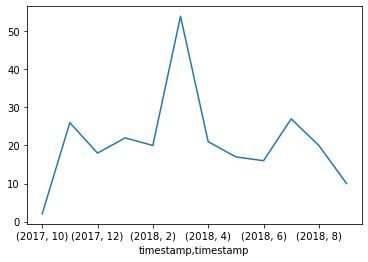

In [154]:
oscar_movie_time_ratings_df.plot()

In [137]:
love_ratings_df = ratings_df[ratings_df['movieId'] == love_movieId]
love_ratings_df['timestamp'] = pd.to_datetime(love_ratings_df['timestamp'], unit = 's')
love_ratings_df

<ipython-input-137-de9193b89f20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  love_ratings_df['timestamp'] = pd.to_datetime(love_ratings_df['timestamp'], unit = 's')


,userId,movieId,rating,timestamp
2981,42,7263,3.5,2010-03-04 07:14:55
28147,255,7263,2.5,2004-03-06 06:08:06
31327,299,7263,4.5,2006-06-08 08:13:40
39542,380,7263,4.0,2009-03-16 01:12:29
75577,788,7263,4.0,2017-10-30 05:54:15
...,...,...,...,...
27667750,282291,7263,3.5,2009-10-02 10:56:27
27695637,282560,7263,4.0,2006-03-07 20:11:05
27699744,282621,7263,3.5,2008-08-30 21:15:20
27736217,283011,7263,4.0,2004-03-04 00:10:51


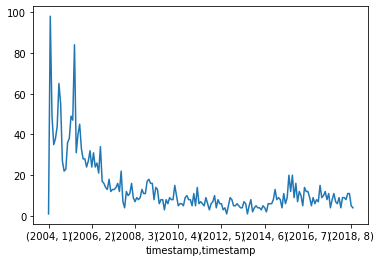

In [138]:
ratings_df.sort_values(by = ['timestamp'])
love_ratings_df.groupby([love_ratings_df['timestamp'].dt.year, love_ratings_df['timestamp'].dt.month]).rating.count().plot()

In [135]:
#177545 in netflix_movieId_arr
netflix_all_ratings_df = ratings_df[ratings_df['movieId'].isin(netflix_rerelease_df['movieId'])]
netflix_movie_ratings_df = netflix_all_ratings_df.groupby(netflix_all_ratings_df['movieId']).count()
netflix_movie_ratings_df

,userId,rating,timestamp
movieId,,,
13,1952,1952,1952
46,3334,3334,3334
527,71516,71516,71516
1192,1224,1224,1224
2687,7475,7475,7475
...,...,...,...
192889,2,2,2
193417,1,1,1
193479,1,1,1


In [117]:
netflix_movie_ratings_df.median()
netflix_movie_ratings_df.sort_values(by='rating', ascending=False).head(20)

,userId,rating,timestamp
movieId,,,
527,71516,71516,71516
115713,11667,11667,11667
106920,9777,9777,9777
8972,9283,9283,9283
2687,7475,7475,7475
106100,6584,6584,6584
66097,6546,6546,6546
97752,5649,5649,5649
128360,5297,5297,5297


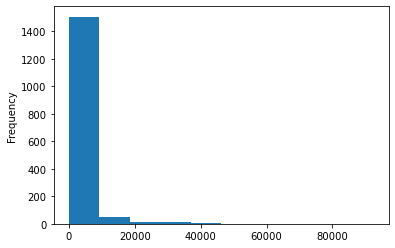

In [80]:
netflix_movie_ratings_df['rating'].plot.hist()